##### This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

##### Following is the Data Dictionary for Credit Card dataset :-

* **CUSTID** : Identification of Credit Card holder (Categorical)
* **BALANCE** : Balance amount left in their account to make purchases
* **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
* **CASHADVANCE** : Cash in advance given by the user
* **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX** : Numbe of purchase transactions made
* **CREDITLIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\ineuron\vs\projects\Datasets\CreditCardUsage\CCUsage.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Performing EDA

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Initial observations
* All are numerical columns except CUST_ID which is an identifier column and can be dropped
* CREDIT_LIMIT has 1 missing record and MINIMUM_PAYMENTS has 313 missing records

##### We can do mean imputation for missing values for the 313 missing values in MINIMUM PAYMENTS and 1 value in CREDIT_LIMIT

In [8]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [9]:
df['MINIMUM_PAYMENTS'] = df["MINIMUM_PAYMENTS"].fillna(df['MINIMUM_PAYMENTS'].mean())

In [10]:
# df["CREDIT_LIMIT"].mean()
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df['CREDIT_LIMIT'].mean())

In [11]:
[feature for feature in df.columns if (df[feature].isnull().sum()>0)]

[]

#### We will drop the CUST_ID column as it doesnt impart much sense to keep it

In [12]:
df = df.iloc[:,1:]

In [13]:
df.shape

(8950, 17)

#### Next we will try to find correlation between the different features

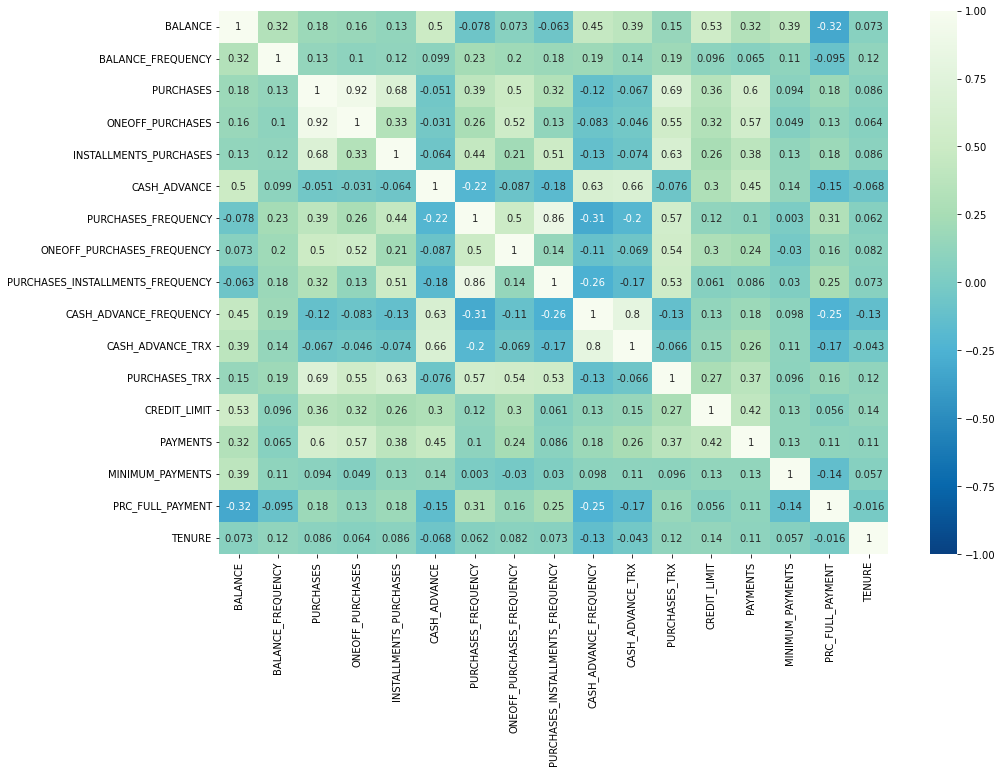

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu_r")
plt.show()

#### Observations
* We will consider the features to be highly co-related only if the corelation coefficients > 0.95
* ONEOFF_PURCHASES has high proportionate corelation(>0.90) with PURCHASES

#### Next we will determine the density plots for each of the features

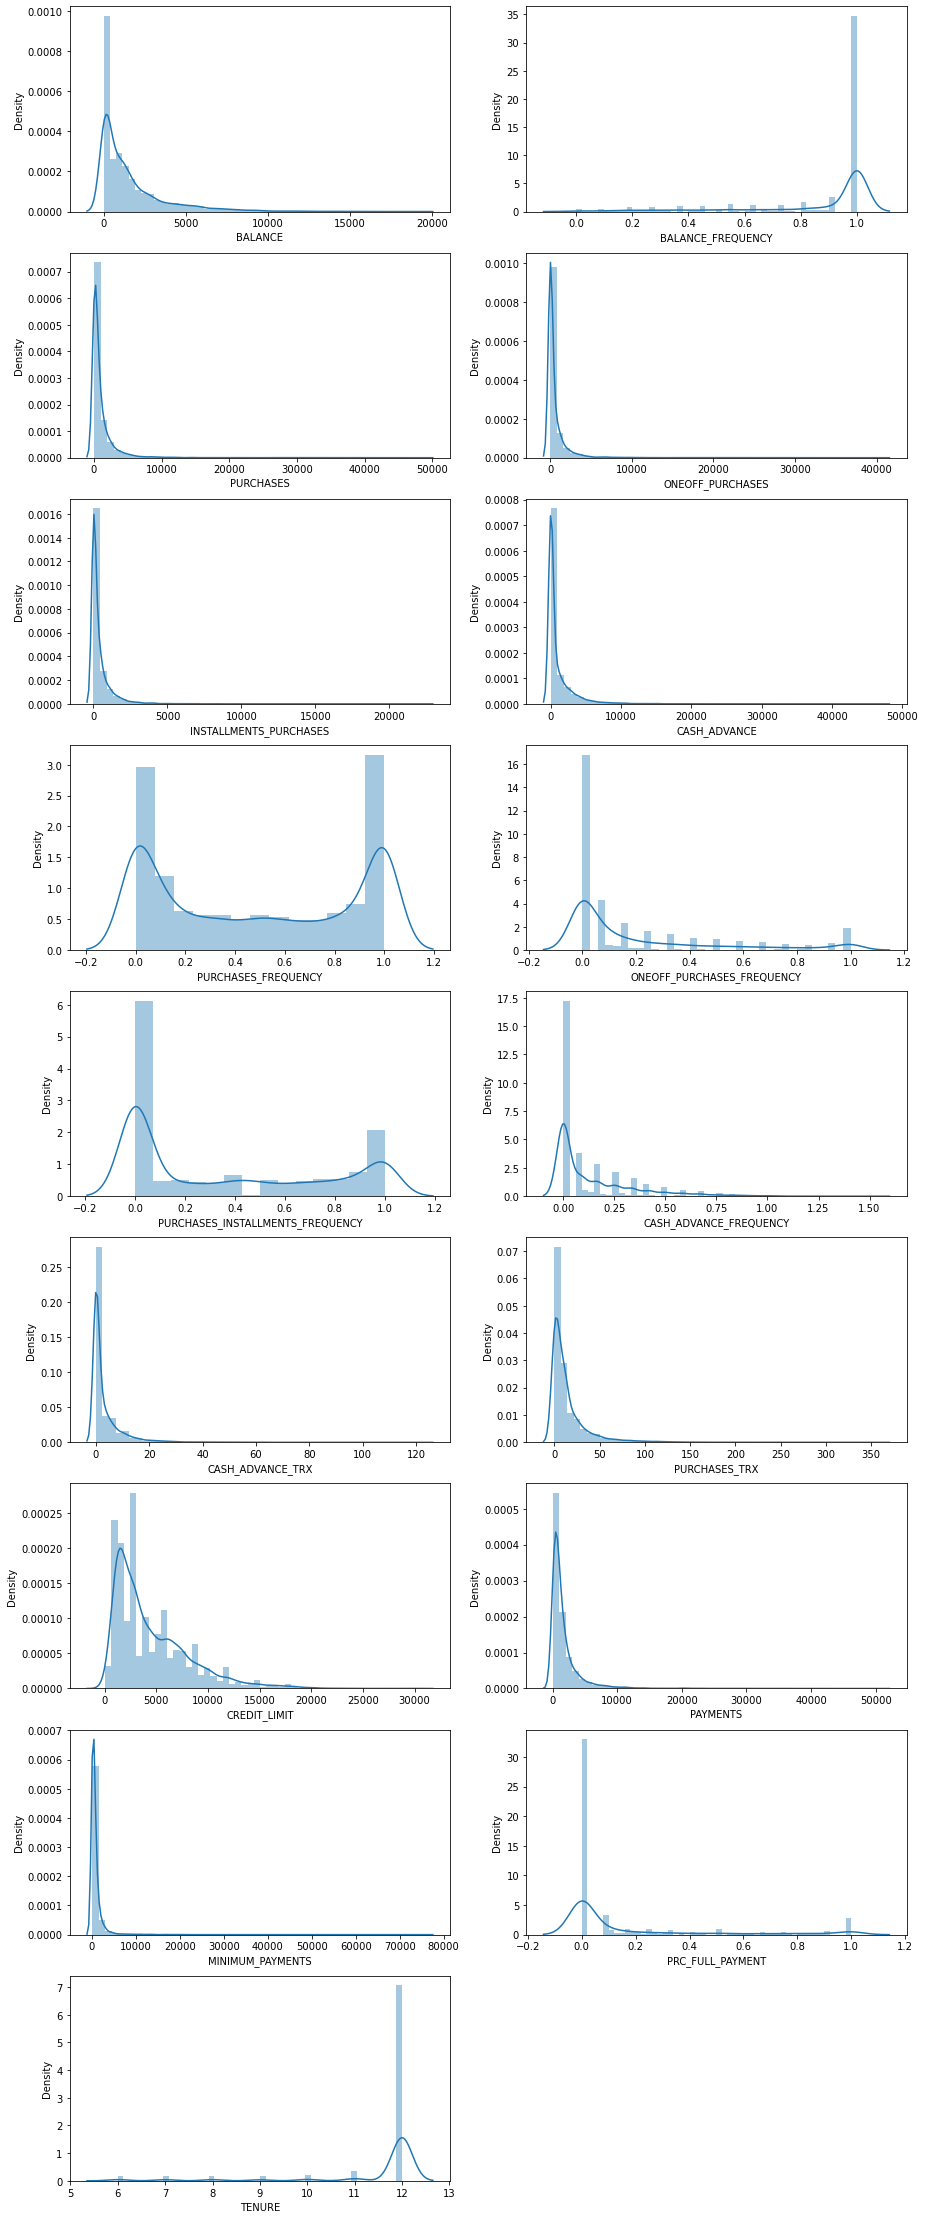

In [15]:
fig,axes = plt.subplots(nrows=9,ncols=2,figsize=(15,40))
count=0
warnings.filterwarnings("ignore")

for i,ax in zip(range(17),axes.flat): # This will iterate from 0 to count till count reaches # of columns
    plt.style.use("ggplot")
    sns.distplot(df.iloc[:,count],ax=ax)
    count=count+1
axes[8][1].pie([])

plt.show()

#### Observations:
* Data density are highly skewed, so we will have to do standard scaling

### Data preprocessing : Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()

In [18]:
scaled_df = ss.fit_transform(df)

In [19]:
# All features are scaled
scaled_df[1]

array([ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
        2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
        0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
        0.2342269 ,  0.36067954])

### Now we will apply ML models such as Clustering

**K-Means Clustering** - This approach is based on creating 'K' clusters on 'n' datapoints by calculating mean squared distance of each point from pre-initialized cluster points.

##### Advantages:
* It performs well on large datasets which can become difficult to handle if you are using some types of hierarchical clustering algorithms
* It also guarantees convergence, and can easily generalize and adapt


##### Disadvantages:
* It is sometimes seen as negative considering there are other clustering methods, such as Hierarchical Clustering, which don't need to have a fixed number of clusters defined beforehand
* Also it is very sensitive to outliers

In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss = []

# We will iterate the number of clusters from 2 to 15
# and plot an elbow curve to determine the best k

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=42, init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

* The 'inertia' function of sklearn will help to calculate the mean squared distance of every point from each centroid
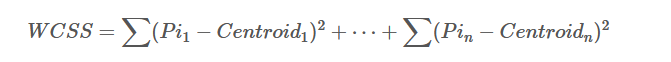

* This will be same as the below function
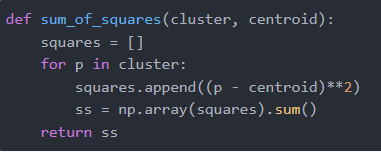

* Now we can get the sum of squares for each cluster:

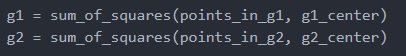

* And sum up the results to obtain the total WCSS:
**g1+g2

##### Visualising the elbow curve for clusters between 2 and 15

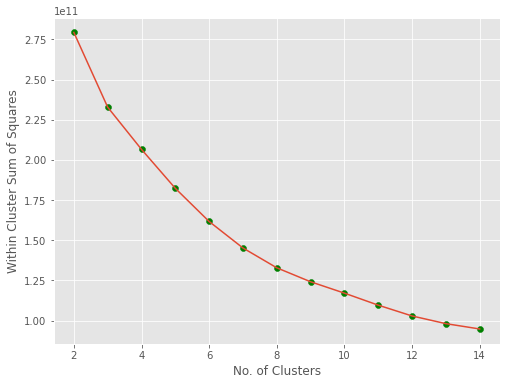

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(2,15),wcss)
plt.scatter(range(2,15),wcss,color="green")
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

##### Observations:
* The optimum number of clusters is difficult to conclude from the elblow curve as it doesn't have a steep descent after a certain point
* We will use KElbowVisualiser to determine best 'K'

In [23]:
!pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

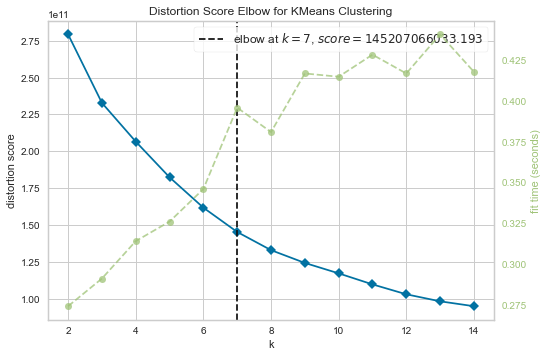

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
model_kev = KMeans(random_state=42, init='k-means++')
kev = KElbowVisualizer(model_kev, k=(2,15))
kev.fit(df)
#plt.show(kev)
kev.show()

##### We will also check out the Silhoutter Cluster Visualizer

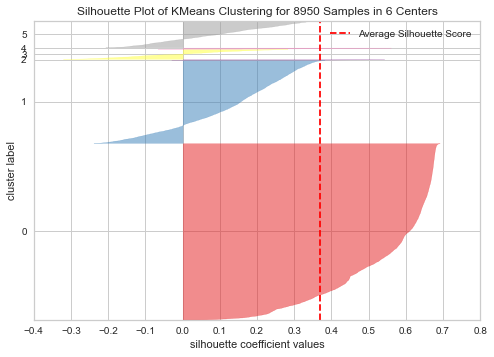

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
model_sv = KMeans(n_clusters=6, random_state=42, init='k-means++')

sv = SilhouetteVisualizer(model_sv)
sv.fit(df)    
sv.show()

##### Points to remember while calculating silhouette coefficient:
* The value of the silhouette coefﬁcient is between [-1, 1].
* A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
* The worst value is -1. Values near 0 denote overlapping clusters.


In [27]:
from sklearn.metrics import silhouette_score

[0.20950134853896507, 0.19786860036818643, 0.20263969974255602, 0.22162514415730208, 0.2229970578735147, 0.21800831027731135, 0.20340854504562306]


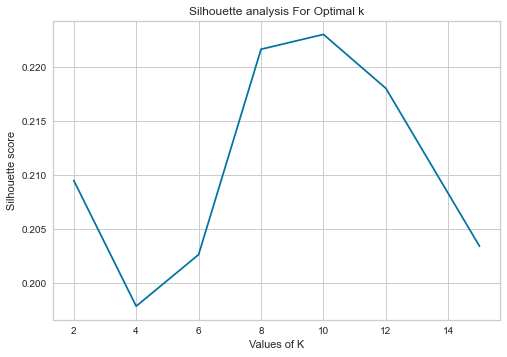

In [52]:
range_n_clusters = [2, 4, 6, 8, 10, 12, 15]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters) # Initialise KMeans
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # Silhouette score
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))


print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

##### Observations:
* Even after using n_clusters = 4,8,10,12,15 there is no significant improvement in the silhoutte scores, hence we will assume that there are 6 optimal clusters for the given data

#### Training the data with K-means with 6 clusters

In [29]:
km = KMeans(n_clusters=6, random_state=42, init="k-means++")
y_kmeans = km.fit_predict(df)

In [30]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5])

In [31]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
frame = pd.DataFrame(scaled_df)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

0    5318
1    2492
5     787
3     291
4      38
2      24
Name: cluster, dtype: int64

##### Observations:
* There are **5318** points belonging to **Cluster0**
* There are **2492** points belonging to **Cluster1**
* There are **787** points belonging to **Cluster2**
* There are **291** points belonging to **Cluster3**
* There are **38** points belonging to **Cluster4**
* There are **24** points belonging to **Cluster5**

#### The below is depiction of clusters between **PURCHASES** and **CREDITLIMT**

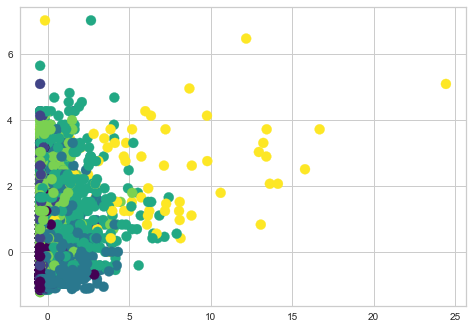

In [37]:
labels = KMeans(n_clusters=6, random_state=42, init="k-means++").fit_predict(scaled_df)
plt.scatter(scaled_df[:, 4], scaled_df[:, -5], c=labels, s=100, cmap='viridis')

### The below is a visualisation of the clusters formed for each dimension

x_centers:
[-0.01, -0.698, -0.397, 0.138, 1.591, 1.444]
y_centers:
[0.372, -2.122, 0.308, 0.427, 0.377, 0.415]


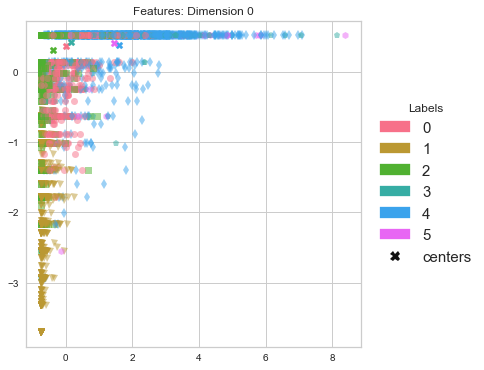

x_centers:
[-0.345, -0.313, -0.067, 0.926, -0.204, 7.093]
y_centers:
[-0.224, -0.231, -0.245, 0.877, -0.149, 6.244]


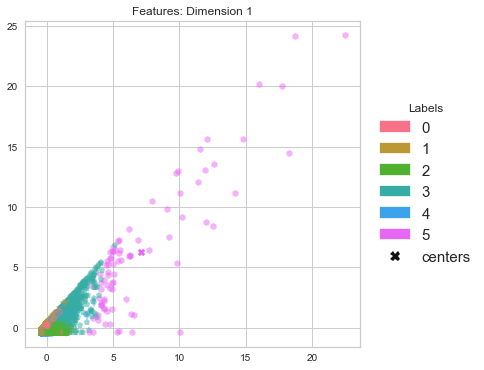

x_centers:
[-0.405, -0.316, 0.29, 0.579, -0.21, 5.298]
y_centers:
[-0.082, -0.307, -0.366, -0.309, 1.95, 0.004]


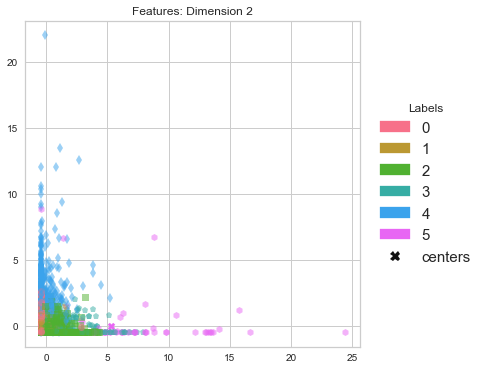

x_centers:
[-0.827, -0.56, 0.965, 1.088, -0.449, 1.082]
y_centers:
[-0.336, -0.419, -0.376, 1.839, -0.184, 1.868]


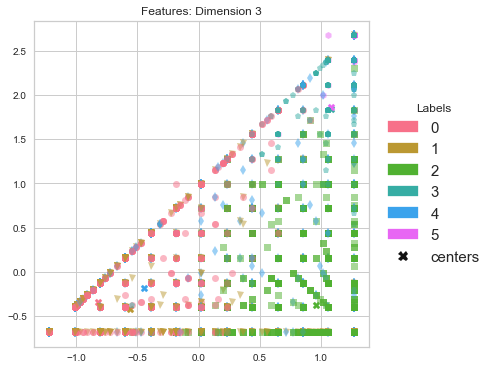

x_centers:
[-0.771, -0.465, 1.139, 0.543, -0.406, 1.035]
y_centers:
[0.132, -0.484, -0.463, -0.406, 1.901, -0.3]


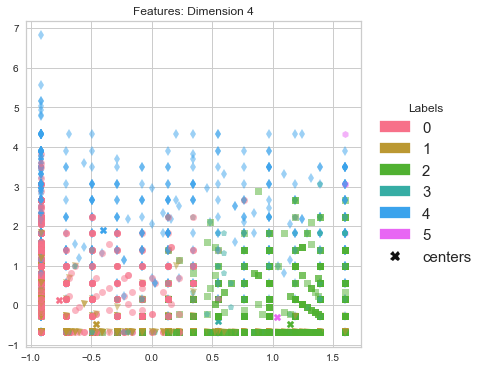

x_centers:
[-0.028, -0.358, -0.358, -0.318, 1.855, -0.117]
y_centers:
[-0.471, -0.426, 0.122, 1.184, -0.244, 4.699]


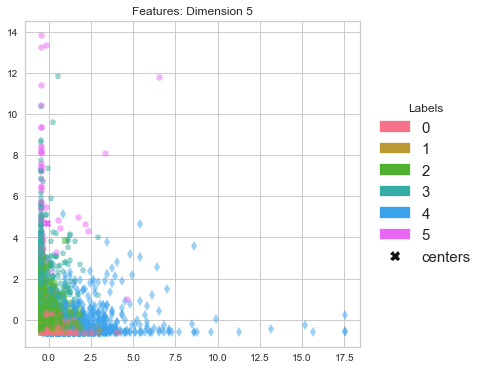

In [54]:
# uses the imports as shown in the question
from matplotlib.patches import Rectangle, Patch  # for creating a legend
from matplotlib.lines import Line2D

# create the model and fit it to features
y_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42).fit(scaled_df)

# find the centers; there are 7
centers = np.array(y_kmeans.cluster_centers_)

# unique markers for the labels
markers = ['o', 'v', 's', 'p', 'd', 'h']

# get the model labels
labels = km.labels_
labels_unique = set(labels)

# unique colors for each label
colors = sns.color_palette('husl', n_colors=len(labels_unique))

# color map with labels and colors
cmap = dict(zip(labels_unique, colors))

# plot
# iterate through each group of 2 centers
for j in range(0, len(centers)*2, 2):
    plt.figure(figsize=(6, 6))
    
    x_features = scaled_df[:, j]
    y_features = scaled_df[:, j+1]
    x_centers = centers[:, j]
    y_centers = centers[:, j+1]
    
    # add the data for each label to the plot
    for i, l in enumerate(labels):
#         print(f'Label: {l}')  # uncomment as needed
#         print(f'feature x coordinates for label:\n{x_features[i]}')  # uncomment as needed
#         print(f'feature y coordinates for label:\n{y_features[i]}')  # uncomment as needed
        plt.plot(x_features[i], y_features[i], color=colors[l], marker=markers[l], alpha=0.5)

    # print values for given plot, rounded for easier interpretation; all 4 can be commented out
    #print(f'feature labels:\n{list(labels)}')
    #print(f'x_features:\n{list(map(lambda x: round(x, 3), x_features))}')
    #print(f'y_features:\n{list(map(lambda x: round(x, 3), y_features))}')
    print(f'x_centers:\n{list(map(lambda x: round(x, 3), x_centers))}')
    print(f'y_centers:\n{list(map(lambda x: round(x, 3), y_centers))}')
    
    # add the centers
    # this loop is to color the center marker to correspond to the color of the corresponding label.
    for k in range(len(centers)):  
        plt.scatter(x_centers[k], y_centers[k], marker="X", color=colors[k])
    
    # title
    plt.title(f'Features: Dimension {int(j/2)}')
    
    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]
    # create centers marker for the legend
    black_x = Line2D([], [], color='k', marker='X', linestyle='None', label='centers', markersize=10)
    # add the legend
    plt.legend(title='Labels', handles=patches + [black_x], bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=15)
    
    plt.show()

### Now plotting Cluster centers

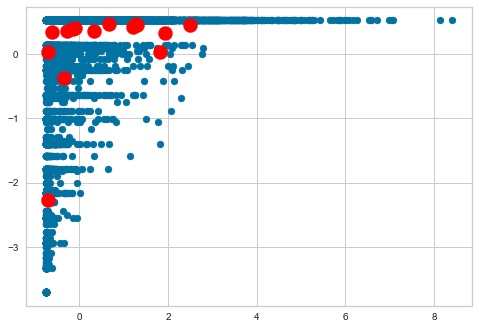

In [55]:
plt.scatter(scaled_df[:,0], 
            scaled_df[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

### We will do the same study using Agglomerative Hierarchical Clustering next

In [39]:
import scipy.cluster.hierarchy as sch

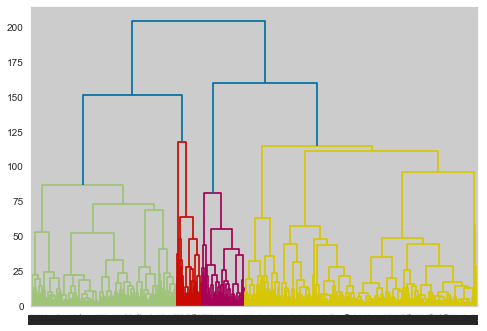

In [40]:
Dendrograms = sch.dendrogram(sch.linkage(scaled_df,method="ward"))
plt.show()

##### Training the Agglomerative Cluster with the data obtained from K++-means Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
hc = AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean")
y_Hierarchical = hc.fit_predict(scaled_df)

In [61]:
frame = pd.DataFrame(scaled_df)
frame['cluster'] = y_Hierarchical
frame['cluster'].value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
Name: cluster, dtype: int64

##### Observations:
* There are **3946** points belonging to **Cluster0**
* There are **2931** points belonging to **Cluster1**
* There are **864** points belonging to **Cluster2**
* There are **722** points belonging to **Cluster3**
* There are **464** points belonging to **Cluster4**
* There are **23** points belonging to **Cluster5**

**Thus we see that Hierarchical Clustering has distributed the data across the clusters more evenly**

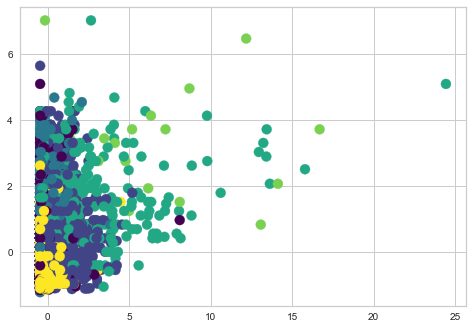

In [46]:
plt.scatter(scaled_df[:, 4], scaled_df[:, -5], c=y_Hierarchical, s=100, cmap='viridis')

### Now we will apply DBSCAN on our data

In [56]:
from sklearn.cluster import DBSCAN

In [68]:
dbscn = DBSCAN(eps=0.5, min_samples=10, metric="euclidean")
y_DBSCN = dbscn.fit_predict(scaled_df)

In [71]:
frame = pd.DataFrame(scaled_df)
frame['cluster'] = y_DBSCN
frame['cluster'].value_counts()


-1    7203
 0    1459
 1     197
 2      21
 4      20
 3      11
 8      10
 5      10
 6      10
 7       9
Name: cluster, dtype: int64

##### Observations:
* There are **7203** points belonging to **Cluster-1**
* There are **1459** points belonging to **Cluster0**
* There are **197** points belonging to **Cluster1**
* There are **21** points belonging to **Cluster2**
* There are **11** points belonging to **Cluster3**
* There are **20** points belonging to **Cluster4**
* There are **10** points belonging to **Cluster5**
* There are **10** points belonging to **Cluster6**
* There are **9** points belonging to **Cluster7**
* There are **10** points belonging to **Cluster8**

**Thus we see that DBSCAN Clustering has further distributed the data across the 9 clusters instead of 6**

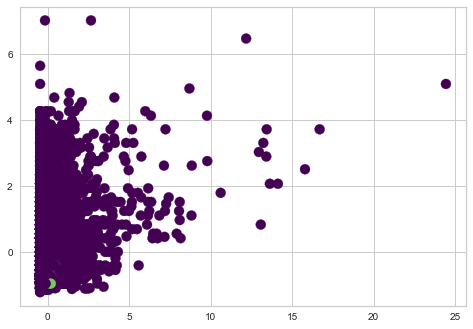

In [58]:
plt.scatter(scaled_df[:, 4], scaled_df[:, -5], c=y_DBSAN, s=100, cmap='viridis')